# Tree Drawing basics
Tree visualization is a fundamental feature of `toytree`. Following our minimalist ethos, it is possible to generate a beautiful tree drawing very easily. But in addition, it is also possible to create complex and data rich visualizations using a variety of styling options.

In [27]:
import toytree
import numpy as np

# an example tree
tree = toytree.rtree.bdtree(ntips=6, seed=123)

## Drawing class objects
When you call `.draw()` on a tree it returns three objects, a `Canvas`, a `Cartesian` axes, and a `Mark`. This follows the design principle of the `toyplot` plotting library on which toytree is based. The `Canvas` describes the plot space, and the `Cartesian` coordinates define how to project `Marks` onto that space. `Marks` are used to represent data using SVG markers and shapes. One canvas can have multiple cartesian coordinates, and each cartesian axes can contain multiple marks.

It is often useful to capture these drawing objects as variables so that they can be reused to further edit or annotate drawings, and to save them. However, if you are working in a jupyter notebook and only intend the drawings to be embedded in the output cells, then you do not need to save the plots externally. Canvas objects automatically render in output cells when they are created (this option can be toggled in [Global config](#Global-config).)

In [28]:
# returns the three drawing objects
tree.draw()

(<toyplot.canvas.Canvas at 0x7f0edbe44be0>,
 <toytree.drawing.src.mark_toytree.ToyTreeMark at 0x7f0edbf6eb90>)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t9ac6a714195d4399b25008b9fa4b3ef0"> r0 r1 r2 r3 r4 r5

Throughout this documentation you will see many `toytree` drawing commands end with a semicolon (;), which is a simple method to hide the returned objects from being displayed in the output cell.

In [29]:
# semicolon hides the returned objects, but drawing still autorenders
tree.draw();

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="td32dc8cfd1804bb1aecb94fdd796a863"> r0 r1 r2 r3 r4 r5

In [30]:
# store the drawing objects as variables
canvas, axes, mark = tree.draw()

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="ta30a23981aed4a278348024ac116683f"> r0 r1 r2 r3 r4 r5

## Builtin Tree Styles
There are innumerous ways to style ToyTree drawings by combining different arguments to the `.draw` function. As a convenience, we also provide a number of pre-built tree styles that represent collections of style arguments that can be set using a single command.

In [85]:
# drawing with pre-built tree_styles
tree.draw(tree_style='s');  # simple-style
tree.draw(tree_style='c');  # coalescent-style
tree.draw(tree_style='r');  # R-style
tree.draw(tree_style='p');  # population-style
tree.draw(tree_style='d');  # dark-style
tree.draw(tree_style='o');  # umlaut-style

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t7c46dda0ec314a7f95ca6736b6cb32ab"> 0 1 2 3 4 5 6 7 8 9 10 r0 r1 r2 r3 r4 r5

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t632f5e0ac80243ca9d7432451f690e1f"> r0 r1 r2 r3 r4 r5 0 0.5 1 1.5

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tf5af5ec1372d4a55924b2064f7e78f8d"> 1-1 4-2 3-2 1-2 0 r0 r1 r2 r3 r4 r5

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t982a52080b524bdc91218322027d7b63"> 0 1 2 3 4 5 6 7 8 9 10 r0 r1 r2 r3 r4 r5 0 0.5 1 1.5

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t260cc35515de4a38b77456110df3819d"> r0 r1 r2 r3 r4 r5

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tcc99326d3b654b9dadcf1263f1a85b13"> r0 r1 r2 r3 r4 r5

You can think of setting a `tree_style` as changing the baseline style on top of which additional drawing arguments can still be added. For example, here we select the "dark" tree style, which changes the default edge and tip colors, and on top of this we can still specify a change to the layout, node marker type, node size, and/or other drawing options.

In [38]:
# tree_style is a baseline on top of which additional styles can be added
tree.draw(tree_style='d', layout='d', node_markers="s", node_sizes=8, height=250);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="250.0px" viewBox="0 0 300.0 250.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t774d7520a86c4363a0777d1307336d52"> r0 r1 r2 r3 r4 r5

## Creating Tree Styles
There are a number of ways to apply individual styles to tree drawings. Which method you use may depend on whether you intend to reuse a particular tree style many times, or just once. The most common method is described below as the "one-time" setting, in which you enter style arguments to the `.draw()` function. You will see this used most common throughout this tutorial. However, it is also possible for users to create reusable styles similar to the builtin tree style types shown above. A final option is to modify style settings saved to the tree objects themselves. Each is demonstrated below.

### One-time style setting
Use tab-completion or other methods to examine the documentation string of the draw function to see the options available for styling tree drawings. 

In [39]:
tree.draw(
    node_sizes=8, node_markers=">", node_mask=False,
    edge_colors="darkmagenta", edge_style={"opacity": 0.3}, edge_type="c", 
    scale_bar=True,
);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t431400a26f324d518b5b0b6166b36338"> r0 r1 r2 r3 r4 r5 1.5 1 0.5 0

### Reusable style dict
You can create a custom reusable tree-style as a dictionary of key-value pairs specifying options to the draw function. To apply this to many tree drawings you can simply use variadics to expand the dictionary as a single argument to the draw function, as demonstrated below. 

In [13]:
# define a re-usable style dictionary
mystyle = {
    "layout": 'd',
    "edge_type": 'p',
    "edge_style": {
        "stroke": "black",
        "stroke-width": 2.5,
    },
    "tip_labels_align": True,
    "tip_labels_colors": "darkcyan",
    "tip_labels_style": {
        "font-size": "15px"
    },
    "node_labels": False,
    "node_sizes": 8,
    "node_colors": "goldenrod",
    "node_mask": False,
}

# apply the custom treestyle dict to a drawing
tree.draw(**mystyle);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tde3f80393aed404c929ff17b6480f53f"> r0 r1 r2 r3 r4 r5

### Persistent style
Finally, you can modify the `.style` settings of a `ToyTree` object to modify its saved default drawing options. This can useful if you plan to visualize the same tree many times, or wish to save different trees with different style settings for easier comparison. For example, it can be used within a function to return a tree object that has a style setting saved to it which will highlight a particular feature or clade when visualized. This framework is also useful for learning which tree style options are available, since you can use tab-completion in an interactive environment to explore the different style options available. In this example, I first create a copy of our example tree object and save the new copy as *stree*. Then, I modify the the style settings of the *stree* object. Finally, we can simply call `.draw()` to draw the tree using its saved tree style. (Note that if you enter a new `tree_style` argument to the draw() function of this tree it will override the settings in the tree's `.style` settings.)

In [14]:
# set a style that will persist on an individual tree object
stree = tree.copy()
stree.style.edge_colors = "darkcyan"
stree.style.edge_widths = 2.5
stree.style.node_mask = False
stree.style.node_sizes = 16
stree.style.node_markers = "s"
stree.style.node_style.fill_opacity = 0.5
stree.style.node_labels = "idx"
stree.style.tip_labels_style.font_size = 16
stree.style.tip_labels_style.anchor_shift = 25
stree.draw();

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t0a6fc62e8e824d0c88e44d54508fd4e2"> 0 1 2 3 4 5 6 7 8 9 10 r0 r1 r2 r3 r4 r5

## Drawing nodes

Plotting node values on a tree is a useful way of representing additional information about trees. See the [Data/Features](/toytree/data) section for details on extracting data from tree objects to plot on nodes. Here we will focus on options available for styling nodes. Nodes are often used to show labels, support values, or trait data. They can convey information through variation in their marker shapes (e.g., circles, rectangles, pie-charts), colors, and size. Node markers in `toytree` are represented by SVG shape objects for which a fill (color), fill-opacity, stroke (outline color), stroke-opacity, and stroke-width can be set. 

Below is a complex example showing how 

In [16]:
# hover over nodes to see pop-up elements
tree.draw(
    node_sizes=18, 
    node_style={"fill-opacity": 0.75, "stroke": "white", "stroke-width": 2.5},
    node_mask=(0, 1, 0),
    node_labels="idx",
    node_labels_style={"font-size": 14, "fill": "white"},
    node_colors=("idx", "BlueRed", 6, 9),
    node_markers="s",
    node_hover=True, 
);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t151dbb8577f84df9a7e3b94d4f2c8293"> idx: 6
dist: 0.596972495123
support: nan
height: 1.12630250437
name: 1-1
tdiv: 0.596972495123 6 idx: 7
dist: 0.0386582269365
support: nan
height: 0.177873309174
name: 4-2
tdiv: 1.54540169032 7 idx: 8
dist: 0.783873618514
support: nan
height: 0.216531536111
name: 3-2
tdiv: 1.50674346338 8 idx: 9
dist: 0.722869844869
support: nan
height: 1.00040515462
name: 1-2
tdiv: 0.596972495123 9 r0 r1 r2 r3 r4 r5

### node_sizes
In the default tree style node sizes are set to zero, meaning that they will not be shown. Node sizes are described in pixel units as floats or ints, which scale node marker sizes. A single value can be entered to apply to all nodes, or a sequence of values of length nnodes can be entered to scale nodes to different sizes. In this case, the values should be enetered in node idxorder, which is best done by extracting data from the tree object itself, as described in [Data/Features](/toytree/data). See also [Range-Mapping](/toytree/range-mapping) for examples of scaling node sizes to data features. 

In [17]:
# hover over nodes to see pop-up elements
tree.draw(node_sizes=12);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t6b79e09f4ef84281a269e37a96e8f8dc"> r0 r1 r2 r3 r4 r5

In [82]:
tree.draw(node_sizes=("height", 5, 20));

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="teccdd8ad8e3b4f48a2d6280b26e915c5"> r0 r1 r2 r3 r4 r5

In [77]:
tree.draw(node_sizes=("height",));

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tf9bc102bcd1d44daa9b5e0a3404015d8"> r0 r1 r2 r3 r4 r5

### node_mask
You will notice that the `node_sizes` argument shown above only adds node markers to the internal nodes. What if we want to choose which nodes to display markers on? In that case, you will want to use the `node_mask` argument. This accepts a boolean or array of boolean values to describe which nodes to show versus hide. There is a convenience function of tree objects named `get_node_mask` that can be used to generate a boolean mask in the correct order to designate a subset of nodes to show. Finally, there is a simplified tuple syntax that can be used to choose to display particular sets of nodes composing only the tips, only the internal nodes, or only the root. 

In [14]:
# mask=False reveals all nodes
tree.draw(node_mask=False, node_sizes=12);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="teca6b352806c443282a91515c36283e7"> r0 r1 r2 r3 r4 r5

In [15]:
# mask=True masks all nodes
tree.draw(node_mask=True, node_sizes=12);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="teb935070ab914115b43de8dc905767fd"> r0 r1 r2 r3 r4 r5

In [16]:
# mask=[True, False, True, ...] shows Nodes with True
mask = tree.get_node_mask(show_tips=True, show_root=True, show_internal=False)
print(mask)
tree.draw(node_mask=mask, node_sizes=12);

[ True  True  True  True  True  True False False False False  True]


<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t21bc8f3638e04c37acc64234528ec301"> r0 r1 r2 r3 r4 r5

In [17]:
# mask=[True, False, True, ...] shows Nodes with True
mask = tree.get_node_mask("~r[0-5]")
print(mask)
tree.draw(node_mask=mask, node_sizes=12);

[ True  True  True  True  True  True False False False False False]


<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tb6f90d6848964ce4b7f4d5ee2108a4a5"> r0 r1 r2 r3 r4 r5

In [279]:
# mask=[True, False, True, ...] shows a subset of Nodes
mask = tree.get_node_mask(2, 3, 7, 8)
print(mask)
tree.draw(node_mask=mask, node_sizes=15, node_labels="idx");

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t201bf63172df43cd8c48a11482ea2174"> 2 3 7 8 r0 r1 r2 r3 r4 r5

### node_markers
Node markers are the shapes of the mark objects plotted on nodes. The default shape is a circle, but a variety of marker shapes are available and can be selected by the shorthand str names used for [toyplot markers](https://toyplot.readthedocs.io/en/stable/markers.html). For example, 's' for a square, 'o' for a circle, 'r1x5' for a rectangle that is 5 times taller than wide. Each marker shape is still scaled to a particular pixel size using the `node_sizes` argument, and optionally shown or hidden using `node_mask`. You can enter a single node marker argument to apply to all nodes uniformly, or a series of node markers of length nnodes to apply different markers shapes to different nodes.

In [24]:
# apply square markers to all nodes
tree.draw(node_sizes=10, node_markers="s");

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="td10016f7de4f46b592a00175b620889b"> r0 r1 r2 r3 r4 r5

In [35]:
# apply rectangle markers to each node
tree.draw(node_sizes=15, node_markers="r2x1");

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t45888802714d4a9da23eb2300046ef2b"> r0 r1 r2 r3 r4 r5

In [36]:
# apply a rectangle marker with width scaled to n digits in data
rects = [f"r{len(str(i))}x1" for i in tree.get_node_data("idx")]
tree.draw(node_sizes=15, node_markers=rects, node_labels="idx");

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="ta4ac72b7bbda48ecb0fba04558155dab"> 6 7 8 9 10 r0 r1 r2 r3 r4 r5

In [58]:
# show 
tree = tree.set_node_data("support", default=100)
tree[-1].support = np.nan
tree.draw(node_labels='support', node_sizes=18, node_markers='r2x1');

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tcf1b5d5874bb48a9b218788d3c8d9f09"> 100 100 100 100 nan r0 r1 r2 r3 r4 r5

In [224]:
# ...
mask = tree.get_node_mask(2, 9, 10)
canvas, axes, mark = tree.draw();
tree.annotate.add_node_markers(axes=axes, marker="s", size=10, mask=mask);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t3f061bf302d64ef087a0edf7fcb7226d"> r0 r1 r2 r3 r4 r5

### node_colors
The fill color of nodes can be set in a variety of ways. The node_colors option can be used to set a single color to all nodes, or different colors to nodes. The colors can be entered manually, or they can be automatically projected from color map to data values. There is another option for setting a single color to all nodes, using node_style.fill. The node_colors argument overrides node_style.fill.

In [72]:
# set a single color to all nodes
tree.draw(node_colors='red', node_sizes=10);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t0aa5294e87704f9ea9396e7afa9fc8c3"> r0 r1 r2 r3 r4 r5

In [73]:
# list of colors of length nnodes
colors = ['darkcyan'] * 6 + ['goldenrod'] * 5
tree.draw(node_colors=colors, node_sizes=10, node_mask=False);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t0d7181b1338f48f8a5602dbf287ec1fa"> r0 r1 r2 r3 r4 r5

Automatically color nodes by projecting a data feature that is saved to tree object, such as the node heights, using [color-mapping](/toytree/color-mapping).

In [76]:
# colormapping the 'height' feature
tree.draw(node_colors='height', node_sizes=10, node_mask=False);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tae0404a31ecb4193bcbb03a74d42c395"> r0 r1 r2 r3 r4 r5

## Global config
The default visualization settings in toytree are inherited from toyplot. This includes the default usage of html format for displaying plots in a notebook, and the default behavior of automatically rendering Canvas objects in a notebook cell when they are created. Both of these options can be changed in the `config` settings of the toyplot library.

In [24]:
import toyplot

# set config options to new settings
toyplot.config.autoformat = "png"
toyplot.config.autorender = False

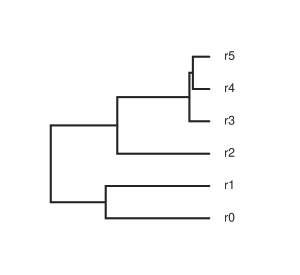

In [25]:
# embed a PNG drawing in the notebook
canvas, axes, mark = tree.draw();

# it will only display here b/c we return the Canvas
canvas

In [26]:
# set config options back to their defaults
toyplot.config.autoformat = "html"
toyplot.config.autorender = True